# 1. Importing the libraries and loading the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("titanic_dataset.csv")

In [3]:
print(data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [5]:
data.isnull().sum() #checking number of missing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# Handle missing values for numerical columns
num_col = data.select_dtypes(include=["number"]).columns
data[num_col] = data[num_col].fillna(data[num_col].mean())

# Handle missing values for categorical columns
cat_col = data.select_dtypes(include=["object"]).columns
for col in cat_col:
    data[col] = data[col].fillna(data[col].mode()[0])  # Replace missing values with the mode

In [7]:
# Check for remaining missing values
print(data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [8]:
data.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

In [9]:
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

In [10]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Cabin       891 non-null    object 
 8   Embarked_Q  891 non-null    bool   
 9   Embarked_S  891 non-null    bool   
dtypes: bool(2), float64(2), int64(5), object(1)
memory usage: 57.6+ KB
None


# 2. Summary Statistics

In [11]:
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
         Survived      Pclass         Sex         Age       SibSp       Parch  \
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000   
mean     0.383838    2.308642    0.352413   29.699118    0.523008    0.381594   
std      0.486592    0.836071    0.477990   13.002015    1.102743    0.806057   
min      0.000000    1.000000    0.000000    0.420000    0.000000    0.000000   
25%      0.000000    2.000000    0.000000   22.000000    0.000000    0.000000   
50%      0.000000    3.000000    0.000000   29.699118    0.000000    0.000000   
75%      1.000000    3.000000    1.000000   35.000000    1.000000    0.000000   
max      1.000000    3.000000    1.000000   80.000000    8.000000    6.000000   

             Fare  
count  891.000000  
mean    32.204208  
std     49.693429  
min      0.000000  
25%      7.910400  
50%     14.454200  
75%     31.000000  
max    512.329200  


In [12]:
num_data = data.select_dtypes(include='number')
print(num_data.median())

Survived     0.000000
Pclass       3.000000
Sex          0.000000
Age         29.699118
SibSp        0.000000
Parch        0.000000
Fare        14.454200
dtype: float64


# 3. Histograms and Boxplots

In [13]:
# List of numeric features
num_ft = ['Age', 'Fare', 'SibSp', 'Parch']  # Replace with your column names

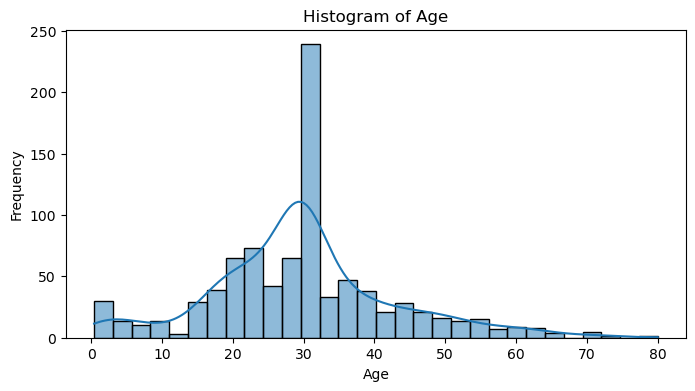

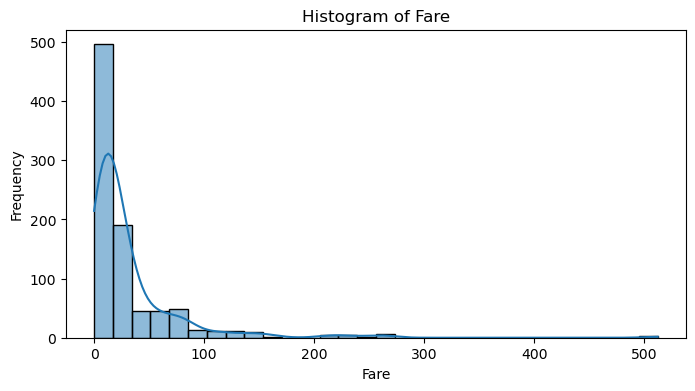

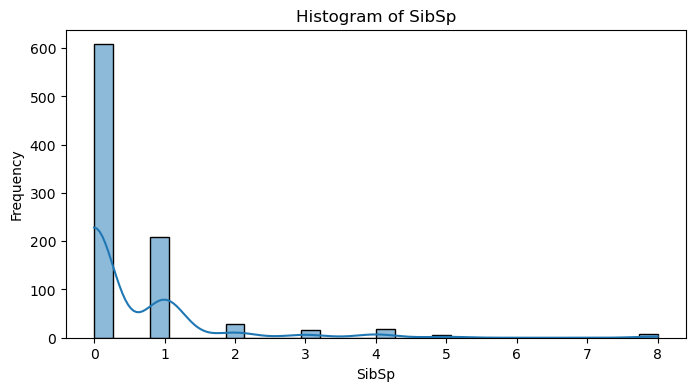

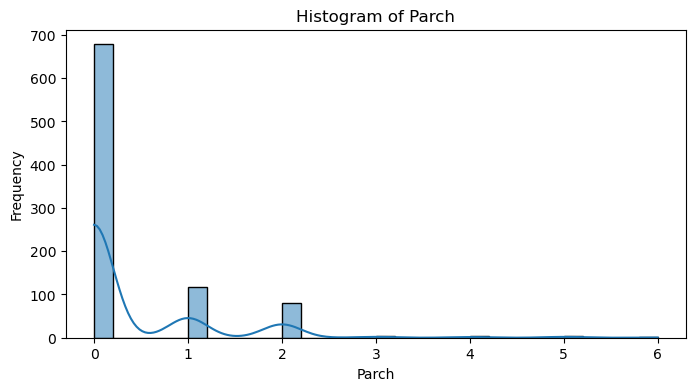

In [14]:
# Create histograms for each numeric feature
for feature in num_ft:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[feature], kde=True, bins=30)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

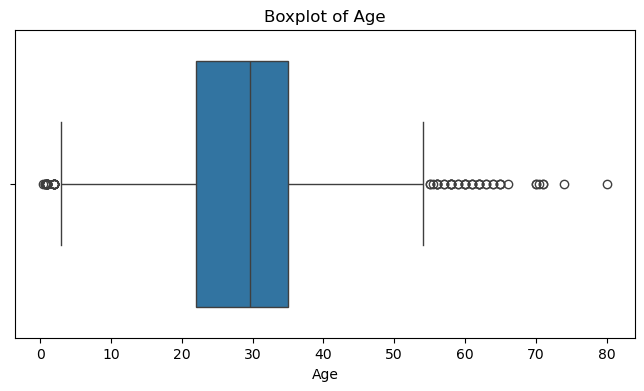

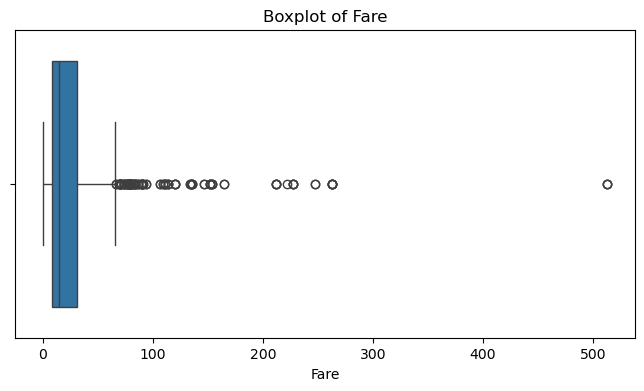

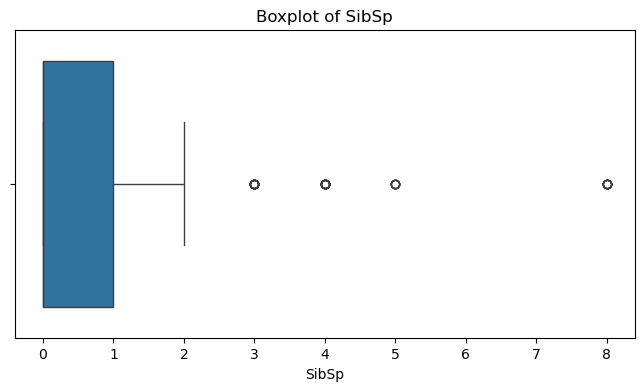

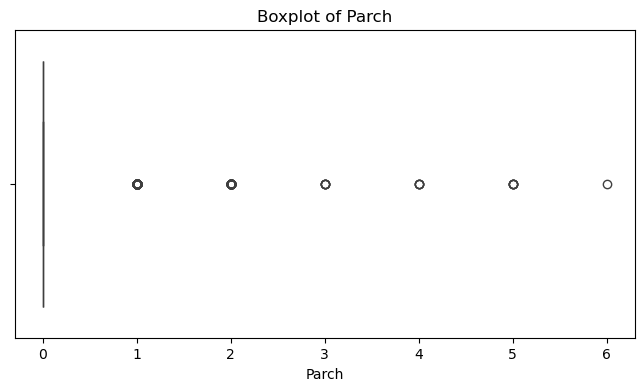

In [15]:
# Create boxplots for each numeric feature
for feature in num_ft:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[feature])
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.show()

# 4 Pairplot/Correlation matrix for feature relationships.

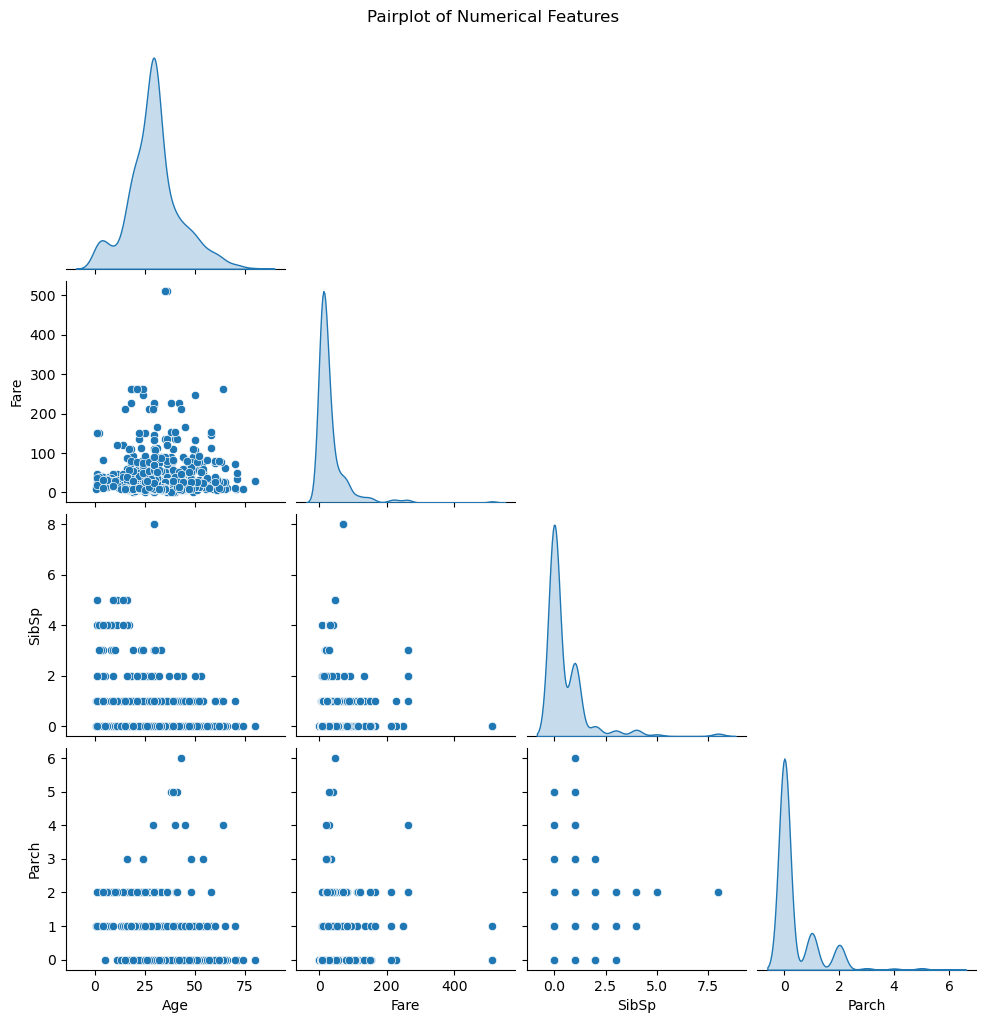

In [16]:
# Create the pairplot
sns.pairplot(data[num_ft], diag_kind='kde', corner=True)
plt.suptitle('Pairplot of Numerical Features', y=1.02)  # Adjust the title position
plt.show()

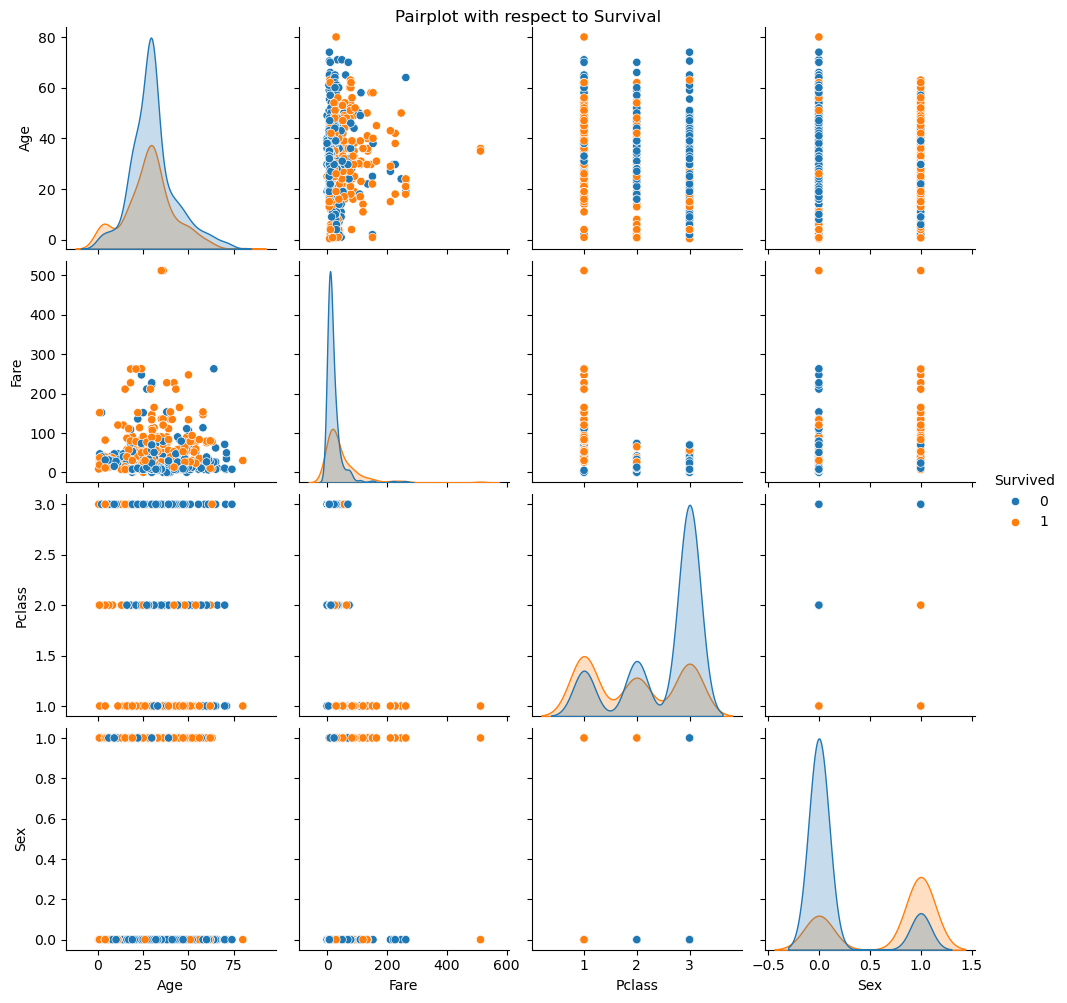

In [17]:
sns.pairplot(data, hue='Survived', vars=['Age', 'Fare', 'Pclass', 'Sex'])
plt.suptitle("Pairplot with respect to Survival", y=1)
plt.show()

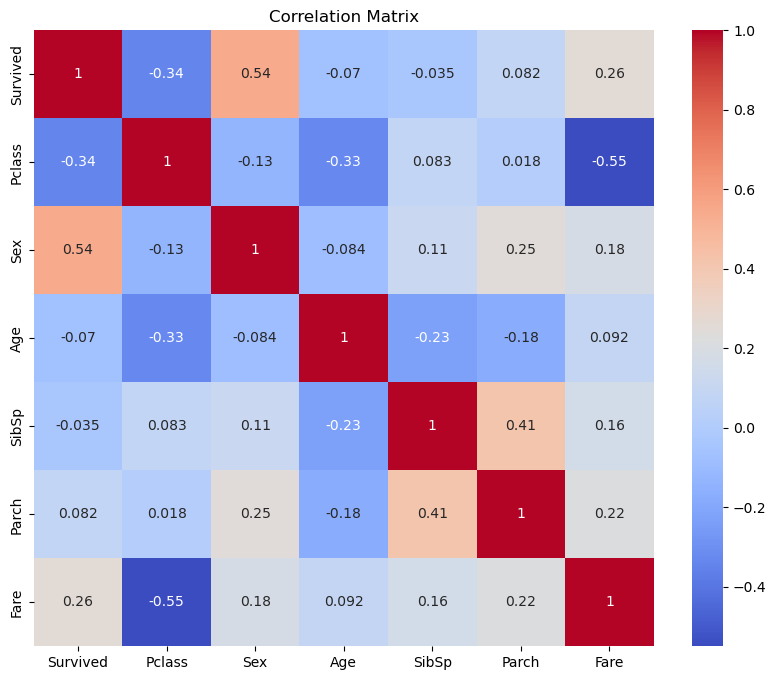

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(num_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# 4 Final

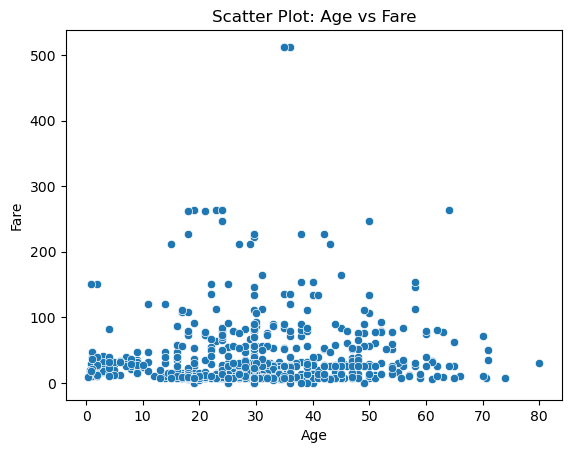

In [19]:
sns.scatterplot(x=data['Age'], y=data['Fare'])
plt.title('Scatter Plot: Age vs Fare')
plt.show()

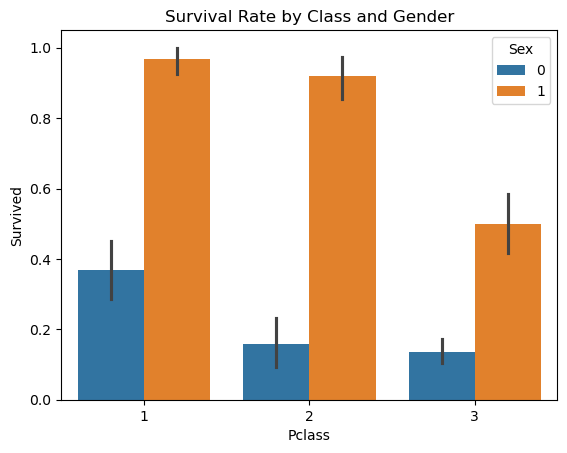

In [20]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=data)
plt.title('Survival Rate by Class and Gender')
plt.show()

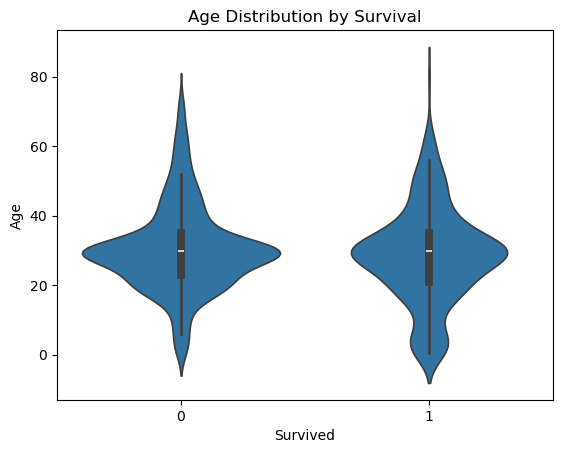

In [21]:
sns.violinplot(x='Survived', y='Age', data=data)
plt.title('Age Distribution by Survival')
plt.show()

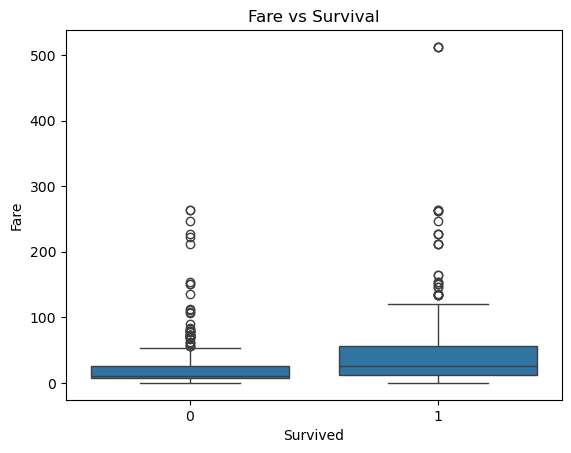

In [22]:
sns.boxplot(x='Survived', y='Fare', data=data)
plt.title('Fare vs Survival')
plt.show()

### Inference: Higher-class passengers (1st class) and females have higher survival rates. Younger passengers (e.g., children) seem to have better survival rates. Passengers who paid higher fares are more likely to survive.